<a href="https://colab.research.google.com/github/reyraff19/Churn-Prediction/blob/main/Churn_Predictor_with_Different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe() # Prints out summary statistics of the dataframe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Visualize the data
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

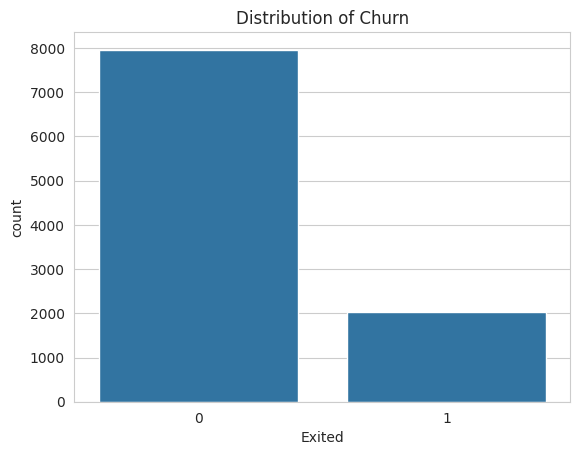

In [ ]:
# Count the number of customers that churned vs. the number of customers that didn't
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")

Text(0.5, 1.0, 'Age Distribution')

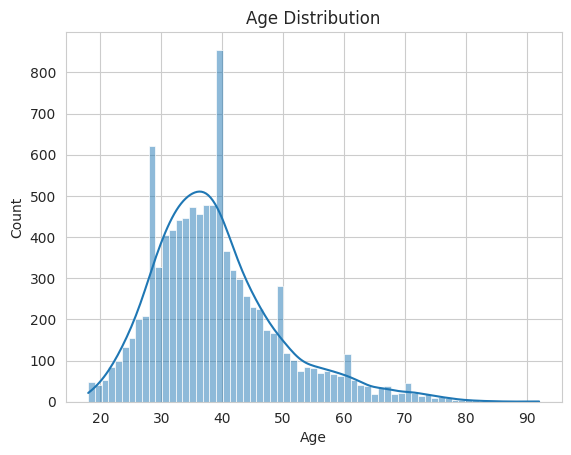

In [ ]:
# Histogram of the age distribution of our customers
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs. Age')

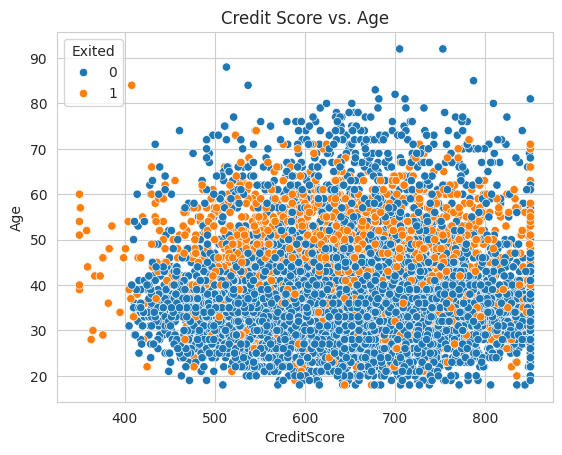

In [ ]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited") # Comparison between customers who churned and did not depending on their credit score and age
plt.title("Credit Score vs. Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

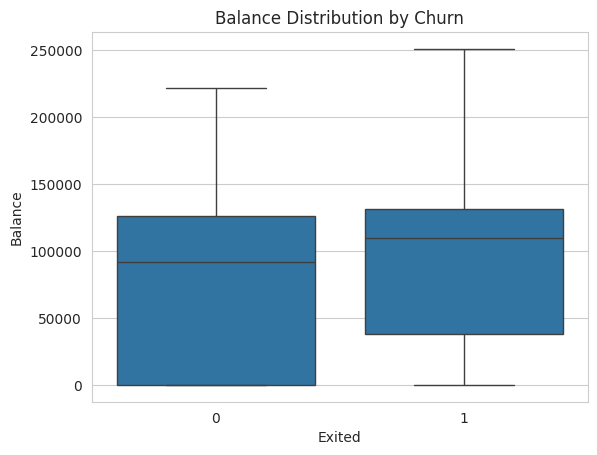

In [ ]:
# Difference of account balances between customers who churned and those who didn't
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'Credit Score Distribution by Churn')

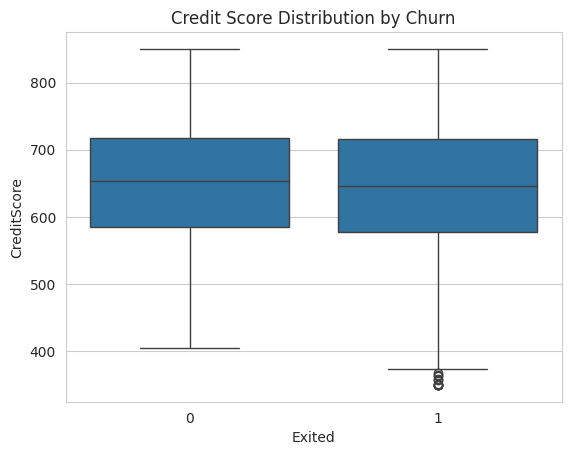

In [ ]:
# Comaprison of credit scores between customers who churned and those who didn't
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score Distribution by Churn")

In [ ]:
# Preprocessing the data, separating the features, age, credit score, gender and target variable, whether the customer churned or not
features = df.drop('Exited', axis=1)

In [ ]:
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
target = df['Exited'] # Shows who did and didn't churn

In [ ]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# Drop unnecessary columns from the df, rownumber, idnumber, surname
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [ ]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# Handle missing values in the data frame
features = features.dropna()

In [ ]:
features # No missing values in this dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
# Convert categorical variables into numerical, such as geography and gender as machine learning models do not understand words or categories
features = pd.get_dummies(features, columns=['Geography', 'Gender'])

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [ ]:
# Split the data into two parts, one for training the model and one for testing the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)#training model on the 90% and testing on 10%

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4896,605,41,5,91612.91,1,1,1,28427.84,True,False,False,False,True
4782,752,53,8,114233.18,1,1,1,51587.04,True,False,False,True,False
1496,569,38,8,0.00,2,0,0,79618.79,False,False,True,False,True
1957,710,54,6,171137.62,1,1,1,167023.95,True,False,False,False,True
9171,411,54,9,0.00,1,0,1,76621.49,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True


In [ ]:
# Scale the features, ensure all the features contribute equally to the model
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # Scaling the training data
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

array([-0.47944328,  0.19687202, -0.00234647,  0.24969536, -0.91364538,
        0.64807894,  0.96892697, -1.24141718,  0.998002  , -0.5761528 ,
       -0.57700814, -0.91105005,  0.91105005])

In [ ]:
# Training the machine learning models, first importing them
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr_model = LogisticRegression(random_state=42)

In [ ]:
#Training the model by passing in training data, learns from the patterns that separate those who churns and those who don't
lr_model.fit(X_train, y_train) # X_train is the training data with the features and y_train is whether the customer will churn or not

LogisticRegression(random_state=42)

In [ ]:
# For an S-shaped curve, it is between 0 and 1, where the features allow for a prediction of 0 or 1, of whether the customer would churn or not
# Using the linear regression model, we can receive data of a new customer to predict whether they will churn or not
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_predictions # Predicts whether or not the customer will or will not churn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
# comparing predictive values to the actual values using the target data
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [ ]:
lr_accuracy

0.808

In [ ]:
#xGBoost receives data, makes a guess then based on that, continues to make more predictions by learning in each previous prediction
#Random Forest receives data then "asks a group of experts" for their opinion and take a majority vote. Each expert has their own opinion, combining their opinions for accurate predictions
#Decision Tree asks yes/no questions, spliting the data into smaller groups and making a decision at the end of the process
#Naive Bayes makes assumptions based on individual features and independently contributes to the outcome
#K Nearest Neighbors makes predictions based on the "nearest neighbors" and makes decisions based on similarity
#Support Vector Machine separates the data into two groups that finds a boundary, with the maximum possible margin

def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("------------")


  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}")


In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_train, X_test, y_train, y_test, "gb_model.pkl")

sc_model = StackingClassifier(estimators=[('xgb', xgb.XGBClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression())
evaluate_and_save_model(sc_model, X_train, X_test, y_train, y_test, "sc_model.pkl")

XGBClassifier Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       809
           1       0.65      0.24      0.35       191

    accuracy                           0.83      1000
   macro avg       0.75      0.60      0.62      1000
weighted avg       0.81      0.83      0.80      1000

------------
Model saved as xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7920

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       809
           1       0.46      0.53      0.50       191

    accuracy                           0.79      1000
   macro avg       0.67      0.69      0.68      1000
weighted avg       0.80      0.79      0.80      1000

------------
Model saved as dt_model.pkl
RandomForestClassifier Accuracy: 0.8640

Classification Report:
              precision    recall  f1-score   support

           0       0.89  

In [ ]:
# Precision shows that the model is right when you predict churn, minimizing false positives
# Recall shows that the model is accurate in catching as many acutal churners as possible, minimizing false negatives
# F1- score takes into account of false positives and false negatives
# Want to focus on recall since a customer can have a big financial impact on the bank.

In [ ]:
# Want to know which features are the most helpful in predicting customer churn
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [ ]:
feature_importances

array([0.03232488, 0.12045205, 0.02950435, 0.05327835, 0.31938732,
       0.02820247, 0.181304  , 0.03116008, 0.03938639, 0.08750244,
       0.03773579, 0.03976187, 0.        ], dtype=float32)

In [ ]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

In [ ]:
feature_importances_df

,feature,importance
0,CreditScore,0.032325
1,Age,0.120452
2,Tenure,0.029504
3,Balance,0.053278
4,NumOfProducts,0.319387
5,HasCrCard,0.028202
6,IsActiveMember,0.181304
7,EstimatedSalary,0.031160
8,Geography_France,0.039386
9,Geography_Germany,0.087502


In [ ]:
# Sort the column to see which feature is the most important
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

In [ ]:
feature_importances_df

,feature,importance
4,NumOfProducts,0.319387
6,IsActiveMember,0.181304
1,Age,0.120452
9,Geography_Germany,0.087502
3,Balance,0.053278
11,Gender_Female,0.039762
8,Geography_France,0.039386
10,Geography_Spain,0.037736
0,CreditScore,0.032325
7,EstimatedSalary,0.031160


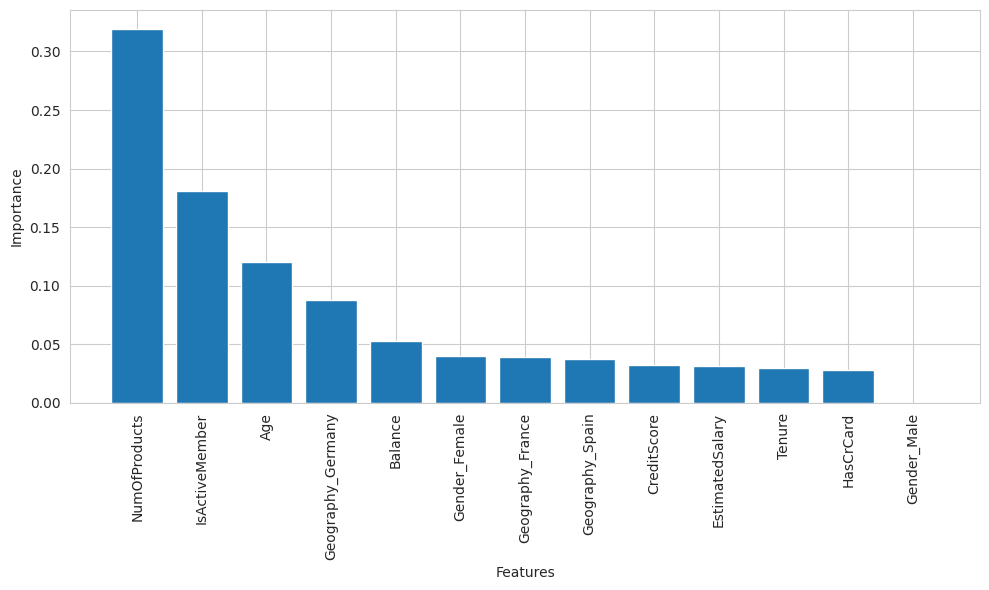

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering is combining features to make new ones, to help the model learn better
# SMOTE creates synthetic data for the minority feature in the dataset to help the model learn better. It is repeated until the minority class is balanced with the majority class.
# Ensembling combines predictions of multiple models to create a new model that is better than the individual models.

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [ ]:
features['CLV'] = df['Balance'] * df['EstimatedSalary'] / 100000

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [ ]:
# Age group of the customer
features['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle-Aged
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle-Aged
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle-Aged
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle-Aged
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Middle-Aged
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Middle-Aged
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Middle-Aged
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Middle-Aged


In [ ]:
features['ESAgeRatio'] = df['EstimatedSalary'] / df['Age']

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,ESAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,Middle-Aged,2413.068571
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,Middle-Aged,2744.940976
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,Middle-Aged,2712.656429
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,Middle-Aged,2405.811026
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,Middle-Aged,1839.165116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,Middle-Aged,2468.477949
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,Middle-Aged,2905.707714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,Middle-Aged,1169.043889
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,Middle-Aged,2211.631429


In [ ]:
features = pd.get_dummies(features, drop_first=True)

In [ ]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,ESAgeRatio,AgeGroup_Middle-Aged,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,2413.068571,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,2744.940976,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,2712.656429,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,2405.811026,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,1839.165116,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,2468.477949,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,2905.707714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,1169.043889,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,2211.631429,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42) # Creates the dataset we want to train with

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,ESAgeRatio,AgeGroup_Middle-Aged,AgeGroup_Senior,AgeGroup_Elderly
4896,605,41,5,91612.91,1,1,1,28427.84,True,False,False,False,True,26043.571474,693.361951,True,False,False
4782,752,53,8,114233.18,1,1,1,51587.04,True,False,False,True,False,58929.516260,973.340377,False,True,False
1496,569,38,8,0.00,2,0,0,79618.79,False,False,True,False,True,0.000000,2095.231316,True,False,False
1957,710,54,6,171137.62,1,1,1,167023.95,True,False,False,False,True,285840.812860,3093.036111,False,True,False
9171,411,54,9,0.00,1,0,1,76621.49,True,False,False,True,False,0.000000,1418.916481,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,1284.834259,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,12.181034,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,2426.845263,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,2267.628837,True,False,False


In [ ]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureEngineered.pkl")

XGBClassifier Accuracy: 0.8640

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       809
           1       0.72      0.48      0.57       191

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

------------
Model saved as xgboost-featureEngineered.pkl


In [ ]:
#After doing this, the recall for the churners decreased from 0.54 to 0.50
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

XGBClassifier Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       809
           1       0.62      0.57      0.59       191

    accuracy                           0.85      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.85      0.85      0.85      1000

------------
Model saved as xgboost-SMOTE.pkl


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state=42, probability=True))],
    voting='hard'
)

In [ ]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_classifier.pkl")

VotingClassifier Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       809
           1       0.62      0.61      0.61       191

    accuracy                           0.85      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.85      0.85      0.85      1000

------------
Model saved as voting_classifier.pkl
